In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# %load_ext line_profiler

In [2]:
PATH = 'c:\\Users\\calvin\\Documents\\GitHub\\springboard\\champions_league_luck'

In [3]:
m = pd.read_csv(PATH+"/data/processed/matchups.csv", parse_dates=['date_g1', 'date_g2'], index_col=0)
dtypes = {'Round':'category', 'Day':'category', 'season': 'category',
         'h_team': 'category', 'HomeCountry': 'category', 'AwayTeam': 'category', 
         'AwayCountry': 'category'}
games = pd.read_csv(PATH+"/data/processed/games.csv", dtype=dtypes, parse_dates=['date'], index_col=0)


In [4]:
# ordering Rounds for analysis later
ordered_rnd = ['first_group', 'second_group', 'group', 'r16', 'quarters', 'semis', 'final']
games.rnd = games.rnd.astype(
    CategoricalDtype(categories=ordered_rnd, ordered=True)
)

In [5]:
# I want to look at how many times each team has been in a knockout round matchup (could be multiple in a year)
# teams = set(m.h_team_g1.unique().tolist() + m.h_team_g2.unique().tolist())
a_counts = m.h_team_g1.value_counts()
b_counts = m.h_team_g2.value_counts()
team_counts = pd.concat([a_counts, b_counts], axis=1).fillna(0)
team_counts['total'] = team_counts.h_team_g1 + team_counts.h_team_g2
team_counts.drop(['h_team_g1', 'h_team_g2'], inplace=True, axis=1)
team_counts

,total
Real Madrid,40.0
Bayern Munich,37.0
Arsenal,22.0
Barcelona,41.0
Milan,20.0
...,...
Bordeaux,2.0
Leicester City,2.0
Beşiktaş,1.0
Fiorentina,1.0


In [6]:
abs(games.coefdiff).describe()

count    2590.000000
mean       40.503961
std        28.354525
min         0.000000
25%        17.850000
50%        36.692500
75%        58.046500
max       150.789000
Name: coefdiff, dtype: float64

In [7]:
teams = list(set(games.h_team.unique().tolist()))

In [8]:
teams_index = {}
for team in teams:
    teams_index[team] = games[(games.h_team == team ) | (games.a_team == team)]

In [9]:
gamescoefs = np.where(games.h_team == 'Real Madrid', games.h_coef - games.a_coef, games.a_coef - games.h_coef)

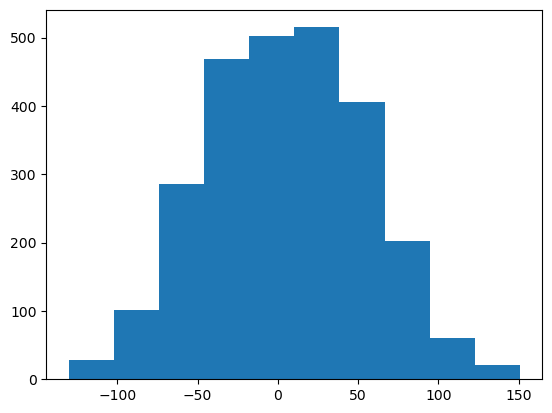

In [10]:
plt.hist(gamescoefs)
plt.show()

In [11]:
for k, v in teams_index.items():
    gamescoefs = np.where(v.h_team == k, v.h_coef - v.a_coef, v.a_coef - v.h_coef)
    print(k, ": ", gamescoefs.mean())

Sturm Graz :  -34.33283333333333
Legia Warsaw :  -84.59766666666667
Levski Sofia :  -60.619333333333344
Hamburger SV :  -6.434499999999997
Marseille :  -21.2534375
Zürich :  -65.106
NK Maribor :  -61.75966666666667
Valencia :  16.23142105263158
Olympiacos :  -3.194372549019607
Boavista :  -13.858500000000001
Debrecen :  -12.64633333333333
Real Sociedad :  -13.976571428571429
Ludogorets :  -12.289916666666665
Zenit :  -6.489645833333332
Lille :  -32.786578947368426
Auxerre :  -4.5157499999999935
Steaua :  -33.01333333333333
Dynamo Kyiv :  -25.82235135135135
Helsingborg :  -56.10533333333333
Anderlecht :  -38.761545454545455
Trabzonspor :  -53.32166666666668
Genk :  -66.96088888888887
Beşiktaş :  -46.71868421052631
Werder Bremen :  4.268100000000002
Arsenal :  22.48852727272727
Panathinaikos :  -20.984827586206894
Real Madrid :  58.39363677130044
Leicester City :  1.4335999999999984
Nantes :  -18.08416666666667
Juventus :  13.251916129032258
Athletic Club :  -33.4565
Atalanta :  8.944444

In [12]:
teams_index['Real Madrid']

,season,rnd,date,day,notes,wk,h_team,h_country,h_score,a_team,...,a_score,h_pens,a_pens,h_coef,a_coef,med_coef,coefdiff,goalstotal,game_winner,teams
993,2000-2001,first_group,2000-09-12,Tue,NaN,1,Sporting CP,pt,2,Real Madrid,...,2,0,0,30.274,99.799,53.963,-69.525,4,tie,"Real Madrid,Sporting CP"
1023,2000-2001,first_group,2000-09-20,Wed,NaN,2,Real Madrid,es,1,Spartak Moscow,...,0,0,0,99.799,65.637,53.963,34.162,1,Real Madrid,"Real Madrid,Spartak Moscow"
1040,2000-2001,first_group,2000-09-27,Wed,NaN,3,Leverkusen,de,2,Real Madrid,...,3,0,0,48.201,99.799,53.963,-51.598,5,Real Madrid,"Real Madrid,Leverkusen"
1046,2000-2001,first_group,2000-10-17,Tue,NaN,4,Real Madrid,es,5,Leverkusen,...,3,0,0,99.799,48.201,53.963,51.598,8,Real Madrid,"Real Madrid,Leverkusen"
1070,2000-2001,first_group,2000-10-25,Wed,NaN,5,Real Madrid,es,4,Sporting CP,...,0,0,0,99.799,30.274,53.963,69.525,4,Real Madrid,"Real Madrid,Sporting CP"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,2019-2020,group,2019-11-06,Wed,NaN,4,Real Madrid,es,6,Galatasaray,...,0,0,0,146.000,22.500,76.500,123.500,6,Real Madrid,"Real Madrid,Galatasaray"
3532,2019-2020,group,2019-11-26,Tue,NaN,5,Real Madrid,es,2,Paris S-G,...,2,0,0,146.000,103.000,76.500,43.000,4,tie,"Real Madrid,Paris S-G"
3558,2019-2020,group,2019-12-11,Wed,NaN,6,Club Brugge,be,1,Real Madrid,...,3,0,0,39.500,146.000,76.500,-106.500,4,Real Madrid,"Real Madrid,Club Brugge"
3566,2019-2020,r16,2020-02-26,Wed,Leg 1 of 2,0,Real Madrid,es,1,Manchester City,...,2,0,0,146.000,106.000,76.500,40.000,3,Manchester City,"Real Madrid,Manchester City"


In [13]:
med_round_per_season = games.groupby(['season', 'rnd'])['h_coef'].median()

In [14]:
med_round_per_season.dropna(inplace=True)

In [15]:
med_round_per_season

season     rnd         
2000-2001  first_group      53.345
           second_group     57.163
           quarters         61.881
           semis            84.799
           final           103.201
                            ...   
2019-2020  group            76.500
           r16              89.000
           quarters         91.250
           semis            69.000
           final           103.000
Name: h_coef, Length: 100, dtype: float64

In [16]:
rounds_per_season = games.set_index(['season', 'rnd'])
testRound = rounds_per_season.loc["2000-2001", "second_group"]
testRound.head()

date  day notes  wk          h_team h_country  \
season    rnd                                                                
2000-2001 second_group 2000-11-21  Tue   NaN   7        Valencia        es   
          second_group 2000-11-21  Tue   NaN   7       Paris S-G        fr   
          second_group 2000-11-21  Tue   NaN   7           Milan        it   
          second_group 2000-11-21  Tue   NaN   7  Manchester Utd       eng   
          second_group 2000-11-22  Wed   NaN   7    Leeds United       eng   

                        h_score         a_team a_country  a_score  h_pens  \
season    rnd                                                               
2000-2001 second_group        2     Sturm Graz        at        0       0   
          second_group        1      La Coruña        es        3       0   
          second_group        2    Galatasaray        tr        2       0   
          second_group        3  Panathinaikos        gr        1       0   
          second_group        0    Real Madrid        es        2       0   

                        a_pens  h_coef  a_coef  med_coef  coefdiff  \
season    rnd                                                        
2000-2001 second_group       0  69.799  26.250    53.963    43.549   
          second_group       0  64.363  53.963    53.963    10.400   
          second_group       0  53.963  51.925    53.963     2.038   
          second_group       0  89.727  44.433    53.963    45.294   
          second_group       0  53.963  99.799    53.963   -45.836   

                        goalstotal     game_winner  \
season    rnd                                        
2000-2001 second_group           2        Valencia   
          second_group           4       La Coruña   
          second_group           4             tie   
          second_group           4  Manchester Utd   
          second_group           2     Real Madrid   

                                               teams  
season    rnd                                         
2000-2001 second_group           Valencia,Sturm Graz  
          second_group           Paris S-G,La Coruña  
          second_group             Milan,Galatasaray  
          second_group  Manchester Utd,Panathinaikos  
          second_group      Real Madrid,Leeds United

In [17]:
ranks = pd.read_csv(PATH + '/data/processed/ranks.csv', index_col=0)

In [18]:
ranks

,team,coef2000,coef2001,coef2002,coef2003,coef2004,coef2005,coef2006,coef2007,coef2008,...,coef2012,coef2013,coef2014,coef2015,coef2016,coef2017,coef2018,coef2019,coef2020,nacounts
0,Juventus,109.963,98.119,91.334,100.155,84.531,93.191,107.020,92.808,66.934,...,46.996,70.829,80.387,95.102,107.087,140.666,126.0,124.0,117.0,0
1,Barcelona,103.799,108.605,116.233,140.769,134.350,117.326,127.006,119.374,117.837,...,157.837,157.605,157.542,164.999,159.142,151.999,132.0,138.0,128.0,0
2,Bayern Munich,103.201,110.316,133.495,124.566,105.331,97.166,80.960,73.640,92.078,...,133.037,146.922,154.328,154.883,163.035,154.899,135.0,128.0,136.0,0
3,Real Madrid,99.799,114.605,147.233,151.769,146.350,131.326,120.006,104.374,93.837,...,121.837,136.605,161.542,171.999,176.142,176.999,162.0,146.0,134.0,0
4,Lazio,94.963,105.119,106.334,106.155,83.531,69.191,57.020,51.808,38.934,...,29.996,41.829,52.387,49.102,63.087,56.666,41.0,37.0,41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Dnipro Dnipropetrovsk,NaN,NaN,13.979,13.291,14.300,24.200,29.777,29.726,31.932,...,14.026,23.951,32.193,52.033,55.476,53.526,34.0,24.0,5.0,2
278,Austria Wien,NaN,NaN,NaN,13.687,8.970,27.208,27.723,30.104,31.840,...,20.765,16.575,23.685,20.635,19.020,17.070,16.0,8.0,10.0,3
287,Villarreal,NaN,NaN,NaN,NaN,42.350,58.326,77.006,78.374,90.837,...,79.837,67.605,53.542,58.999,60.142,64.999,52.0,68.0,56.0,4
289,Manchester City,NaN,NaN,NaN,NaN,26.511,26.864,26.950,28.618,30.996,...,63.882,70.592,72.949,87.078,99.256,100.192,100.0,106.0,116.0,4


In [19]:
from sklearn.cluster import KMeans

X = testRound.h_coef.values.reshape(-1, 1)

model = KMeans(n_clusters=3)
model.fit(X)
model.labels_
model.cluster_centers_, model.inertia_

(array([[96.9225],
        [57.1136],
        [26.8875]]),
 1912.6256877)

In [20]:
sorted([i[0] for i in model.cluster_centers_])


[26.887499999999996, 57.1136, 96.92249999999999]

In [21]:
testRound['kmeans_guess'] = model.labels_

<ipython-input-21-80436b780291>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testRound['kmeans_guess'] = model.labels_


In [22]:
testRound[['h_team', 'h_coef', 'kmeans_guess']]

h_team   h_coef  kmeans_guess
season    rnd                                                
2000-2001 second_group        Valencia   69.799             1
          second_group       Paris S-G   64.363             1
          second_group           Milan   53.963             1
          second_group  Manchester Utd   89.727             0
          second_group    Leeds United   53.963             1
          second_group      Anderlecht   27.525             2
          second_group  Spartak Moscow   65.637             1
          second_group   Bayern Munich  103.201             0
          second_group           Lazio   94.963             0
          second_group            Lyon   60.363             1
          second_group         Arsenal   52.727             1
          second_group     Real Madrid   99.799             0
          second_group      Sturm Graz   26.250             2
          second_group       La Coruña   53.963             1
          second_group     Galatasaray   51.925             1
          second_group   Panathinaikos   44.433             1
          second_group     Real Madrid   99.799             0
          second_group            Lyon   60.363             1
          second_group    Leeds United   53.963             1
          second_group   Bayern Munich  103.201             0
          second_group     Galatasaray   51.925             1
          second_group      Sturm Graz   26.250             2
          second_group           Milan   53.963             1
          second_group        Valencia   69.799             1
          second_group   Panathinaikos   44.433             1
          second_group       La Coruña   53.963             1
          second_group       Paris S-G   64.363             1
          second_group  Manchester Utd   89.727             0
          second_group           Lazio   94.963             0
          second_group  Spartak Moscow   65.637             1
          second_group      Anderlecht   27.525             2
          second_group         Arsenal   52.727             1
          second_group            Lyon   60.363             1
          second_group     Real Madrid   99.799             0
          second_group         Arsenal   52.727             1
          second_group           Lazio   94.963             0
          second_group     Galatasaray   51.925             1
          second_group       La Coruña   53.963             1
          second_group      Sturm Graz   26.250             2
          second_group   Panathinaikos   44.433             1
          second_group           Milan   53.963             1
          second_group       Paris S-G   64.363             1
          second_group  Manchester Utd   89.727             0
          second_group        Valencia   69.799             1
          second_group  Spartak Moscow   65.637             1
          second_group    Leeds United   53.963             1
          second_group      Anderlecht   27.525             2
          second_group   Bayern Munich  103.201             0

In [23]:
testRound.h_team
print(testRound.a_team.unique())

['Sturm Graz' 'La Coruña' 'Galatasaray' 'Panathinaikos' 'Real Madrid'
 'Lazio' 'Arsenal' 'Lyon' 'Leeds United' 'Spartak Moscow' 'Bayern Munich'
 'Anderlecht' 'Manchester Utd' 'Milan' 'Paris S-G' 'Valencia']


In [24]:
seasons = games.season.unique()

In [25]:
ranks_per_season = {}
for season in seasons:
    teams = games[games.season == season][['h_team', 'h_coef']].drop_duplicates()
    X = teams['h_coef'].values.reshape(-1,1)
    model = KMeans(n_clusters=3, random_state=1234)
    model.fit(X)
    teams['group'] = model.labels_

    # since the labels are random, i need to order them based on coef 
    og_order = dict(zip([i[0] for i in model.cluster_centers_], [0, 1, 2]))
    for idx, i in enumerate(sorted(og_order.keys())):
        og_order[i] = idx
    teams.group = teams.group.map(dict(zip([0, 1, 2], og_order.values()) ) )

    ranks_per_season[season] = teams

In [26]:
ranks_per_season = {}
for season in seasons:
    teams = games[games.season == season][['h_team', 'h_coef']].drop_duplicates()
    X = teams['h_coef'].values.reshape(-1,1)
    model = KMeans(n_clusters=3, random_state=1234)
    model.fit(X)
    teams['group'] = model.labels_

    # since the labels are random, i need to order them based on coef 
    og_order = dict(zip([i[0] for i in model.cluster_centers_], [0, 1, 2]))
    for idx, i in enumerate(sorted(og_order.keys())):
        og_order[i] = idx
    teams.group = teams.group.map(dict(zip([0, 1, 2], og_order.values()) ) )
    season_team = (season, )
    ranks_per_season[season] = teams

In [27]:
ranks_per_season['2000-2001']['season'] = '2000-2001'
ranks_per_season['2000-2001'].group = ranks_per_season['2000-2001'].group.astype('string')

In [28]:
fig = px.scatter(ranks_per_season['2000-2001'], x='h_coef', y='season', color='group',
                                    title='KMeans Cluster of Coefficients')
fig.show()

In [29]:
# looks like the groups are now in order
# for each season grouop 0 is the lesser teams, 1 are the average teams, 2 are the good teams
[v.sort_values('h_coef').head() for k, v in ranks_per_season.items()]

[           h_team  h_coef group     season
 1000     Shakhtar  15.583     0  2000-2001
 1004  Helsingborg  16.766     0  2000-2001
 1019   Heerenveen  24.333     0  2000-2001
 1017   Sturm Graz  26.250     0  2000-2001
 1011     Beşiktaş  26.925     0  2000-2001,
              h_team  h_coef  group
 1158     Fenerbahçe  24.987      0
 1180         Celtic  25.312      0
 1173  Panathinaikos  37.183      0
 1178  Sparta Prague  37.395      0
 1168     Anderlecht  43.075      0,
              h_team  h_coef  group
 1310          Basel  14.312      0
 1325  Maccabi Haifa  18.666      0
 1311           Genk  21.762      0
 1330    Club Brugge  41.762      0
 1326  Newcastle Utd  43.729      0,
            h_team  h_coef  group
 1466     Partizan  20.915      0
 1468     Beşiktaş  33.495      0
 1464  Club Brugge  44.250      0
 1486       Monaco  45.734      0
 1481   Anderlecht  49.250      0,
                 h_team  h_coef  group
 1617       CSKA Moscow   8.572      0
 1601  Maccabi Tel

In [30]:
# looks like the groups are ordered now.

In [31]:
# now i need to map the groups to the games
# the best way i could find was to zip the season and team together to apply a map
# I tried other ways but i liked this the best

In [32]:
games.set_index('season', inplace=True)

In [33]:
rank_group = pd.DataFrame()
for season, v in ranks_per_season.items():
    v = v.drop('h_coef', axis=1).set_index('h_team').to_dict()['group']
    df = pd.DataFrame()
    df['team'] = games.loc[season].h_team
    df['group'] = df['team'].map(v)
    rank_group = pd.concat([rank_group, df])

In [34]:
rank_group['season_team'] = tuple(zip(rank_group.index, rank_group.team))
mapper = (rank_group.reset_index()
    .drop(['season', 'team'], axis=1)
    .set_index('season_team')
    .to_dict()['group']
    
)

In [35]:
rank_group

,team,group,season_team
season,,,
2000-2001,Sporting CP,0,"(2000-2001, Sporting CP)"
2000-2001,Lyon,1,"(2000-2001, Lyon)"
2000-2001,Galatasaray,1,"(2000-2001, Galatasaray)"
2000-2001,Rangers,0,"(2000-2001, Rangers)"
2000-2001,Sparta Prague,1,"(2000-2001, Sparta Prague)"
...,...,...,...
2019-2020,Barcelona,2.0,"(2019-2020, Barcelona)"
2019-2020,Manchester City,2.0,"(2019-2020, Manchester City)"
2019-2020,RB Leipzig,1.0,"(2019-2020, RB Leipzig)"


In [36]:
mapper[('2015-2016', 'Atlético Madrid')]

1.0

In [37]:
games['h_season_team'] = tuple(zip(games.index, games.h_team))
games['a_season_team'] = tuple(zip(games.index, games.a_team))

In [38]:
games['h_rank_group'] = games.h_season_team.map(mapper)
games['a_rank_group'] = games.a_season_team.map(mapper)

In [39]:
games.drop(['h_season_team', 'a_season_team'], axis=1, inplace=True)
games = (games
            .astype({'h_rank_group': 'int64', 'a_rank_group': 'int64'})
            .reset_index()
        )

In [40]:
season_list = list(games.season.unique())

In [41]:
teams = list(set(games.h_team.unique().tolist()))

In [42]:
rounds = list(games.rnd.unique())

In [43]:
team = 'Bayern Munich'

In [44]:
games.set_index(['season', 'rnd'], inplace=True)

In [45]:
team_games = games[ (games.h_team == team) | (games.a_team == team) ]

In [46]:
season = team_games.loc['2000-2001']

In [47]:
h = season[season.h_team == team]
a = season[season.h_team != team]

In [48]:
team_games

date  day                          notes  wk  \
season    rnd                                                              
2000-2001 first_group 2000-09-13  Wed                            NaN   1   
          first_group 2000-09-19  Tue                            NaN   2   
          first_group 2000-09-26  Tue                            NaN   3   
          first_group 2000-10-18  Wed                            NaN   4   
          first_group 2000-10-24  Tue                            NaN   5   
...                          ...  ...                            ...  ..   
2019-2020 r16         2020-02-25  Tue                     Leg 1 of 2   0   
          r16         2020-08-08  Sat  Leg 2 of 2; Bayern Munich won   0   
          quarters    2020-08-14  Fri                            NaN   0   
          semis       2020-08-19  Wed                            NaN   0   
          final       2020-08-23  Sun                            NaN   0   

                              h_team h_country  h_score         a_team  \
season    rnd                                                            
2000-2001 first_group    Helsingborg        se        1  Bayern Munich   
          first_group  Bayern Munich        de        3      Rosenborg   
          first_group      Paris S-G        fr        1  Bayern Munich   
          first_group  Bayern Munich        de        2      Paris S-G   
          first_group  Bayern Munich        de        0    Helsingborg   
...                              ...       ...      ...            ...   
2019-2020 r16                Chelsea       eng        0  Bayern Munich   
          r16          Bayern Munich        de        4        Chelsea   
          quarters         Barcelona        es        2  Bayern Munich   
          semis                 Lyon        fr        0  Bayern Munich   
          final            Paris S-G        fr        0  Bayern Munich   

                      a_country  a_score  ...  a_pens   h_coef   a_coef  \
season    rnd                             ...                             
2000-2001 first_group        de        3  ...       0   16.766  103.201   
          first_group        no        1  ...       0  103.201   51.050   
          first_group        de        0  ...       0   64.363  103.201   
          first_group        fr        0  ...       0  103.201   64.363   
          first_group        se        0  ...       0  103.201   16.766   
...                         ...      ...  ...     ...      ...      ...   
2019-2020 r16                de        3  ...       0   87.000  128.000   
          r16               eng        1  ...       0  128.000   87.000   
          quarters           de        8  ...       0  138.000  128.000   
          semis              de        3  ...       0   61.500  128.000   
          final              de        1  ...       0  103.000  128.000   

                       med_coef  coefdiff  goalstotal    game_winner  \
season    rnd                                                          
2000-2001 first_group    53.963   -86.435           4  Bayern Munich   
          first_group    53.963    52.151           4  Bayern Munich   
          first_group    53.963   -38.838           1      Paris S-G   
          first_group    53.963    38.838           2  Bayern Munich   
          first_group    53.963    86.435           0            tie   
...                         ...       ...         ...            ...   
2019-2020 r16            76.500   -41.000           3  Bayern Munich   
          r16            76.500    41.000           5  Bayern Munich   
          quarters       76.500    10.000          10  Bayern Munich   
          semis          76.500   -66.500           3  Bayern Munich   
          final          76.500   -25.000           1  Bayern Munich   

                                           teams h_rank_group  a_rank_group  
season    rnd                                                                
2000-20

In [49]:
h

,date,day,notes,wk,h_team,h_country,h_score,a_team,a_country,a_score,...,a_pens,h_coef,a_coef,med_coef,coefdiff,goalstotal,game_winner,teams,h_rank_group,a_rank_group
rnd,,,,,,,,,,,,,,,,,,,,,
first_group,2000-09-19,Tue,NaN,2,Bayern Munich,de,3,Rosenborg,no,1,...,0,103.201,51.050,53.963,52.151,4,Bayern Munich,"Bayern Munich,Rosenborg",2,1
first_group,2000-10-18,Wed,NaN,4,Bayern Munich,de,2,Paris S-G,fr,0,...,0,103.201,64.363,53.963,38.838,2,Bayern Munich,"Bayern Munich,Paris S-G",2,1
first_group,2000-10-24,Tue,NaN,5,Bayern Munich,de,0,Helsingborg,se,0,...,0,103.201,16.766,53.963,86.435,0,tie,"Bayern Munich,Helsingborg",2,0
second_group,2000-11-22,Wed,NaN,7,Bayern Munich,de,1,Lyon,fr,0,...,0,103.201,60.363,53.963,42.838,1,Bayern Munich,"Bayern Munich,Lyon",2,1
second_group,2001-02-13,Tue,NaN,9,Bayern Munich,de,1,Spartak Moscow,ru,0,...,0,103.201,65.637,53.963,37.564,1,Bayern Munich,"Bayern Munich,Spartak Moscow",2,1
second_group,2001-03-14,Wed,NaN,12,Bayern Munich,de,1,Arsenal,eng,0,...,0,103.201,52.727,53.963,50.474,1,Bayern Munich,"Bayern Munich,Arsenal",2,1
quarters,2001-04-18,Wed,Leg 2 of 2; Bayern Munich won,0,Bayern Munich,de,2,Manchester Utd,eng,1,...,0,103.201,89.727,53.963,13.474,3,Bayern Munich,"Bayern Munich,Manchester Utd",2,2
semis,2001-05-09,Wed,Leg 2 of 2; Bayern Munich won,0,Bayern Munich,de,2,Real Madrid,es,1,...,0,103.201,99.799,53.963,3.402,3,Bayern Munich,"Bayern Munich,Real Madrid",2,2
final,2001-05-23,Wed,Required Extra Time,0,Bayern Munich,de,1,Valencia,es,1,...,4,103.201,69.799,53.963,33.402,2,Bayern Munich,"Bayern Munich,Valencia",2,1


In [50]:
a

,date,day,notes,wk,h_team,h_country,h_score,a_team,a_country,a_score,...,a_pens,h_coef,a_coef,med_coef,coefdiff,goalstotal,game_winner,teams,h_rank_group,a_rank_group
rnd,,,,,,,,,,,,,,,,,,,,,
first_group,2000-09-13,Wed,NaN,1,Helsingborg,se,1,Bayern Munich,de,3,...,0,16.766,103.201,53.963,-86.435,4,Bayern Munich,"Bayern Munich,Helsingborg",0,2
first_group,2000-09-26,Tue,NaN,3,Paris S-G,fr,1,Bayern Munich,de,0,...,0,64.363,103.201,53.963,-38.838,1,Paris S-G,"Bayern Munich,Paris S-G",1,2
first_group,2000-11-08,Wed,NaN,6,Rosenborg,no,1,Bayern Munich,de,1,...,0,51.050,103.201,53.963,-52.151,2,tie,"Bayern Munich,Rosenborg",1,2
second_group,2000-12-05,Tue,NaN,8,Arsenal,eng,2,Bayern Munich,de,2,...,0,52.727,103.201,53.963,-50.474,4,tie,"Bayern Munich,Arsenal",1,2
second_group,2001-02-21,Wed,NaN,10,Spartak Moscow,ru,0,Bayern Munich,de,3,...,0,65.637,103.201,53.963,-37.564,3,Bayern Munich,"Bayern Munich,Spartak Moscow",1,2
second_group,2001-03-06,Tue,NaN,11,Lyon,fr,3,Bayern Munich,de,0,...,0,60.363,103.201,53.963,-42.838,3,Lyon,"Bayern Munich,Lyon",1,2
quarters,2001-04-03,Tue,Leg 1 of 2,0,Manchester Utd,eng,0,Bayern Munich,de,1,...,0,89.727,103.201,53.963,-13.474,1,Bayern Munich,"Bayern Munich,Manchester Utd",2,2
semis,2001-05-01,Tue,Leg 1 of 2,0,Real Madrid,es,0,Bayern Munich,de,1,...,0,99.799,103.201,53.963,-3.402,1,Bayern Munich,"Bayern Munich,Real Madrid",2,2


In [51]:
# average opponent coef - weighted average of both sets
( (h.a_coef.mean() * len(h)) + (a.h_coef.mean() * len(a)) ) / (len(h) + len(a))

62.98017647058822

In [52]:
# # average opponent rank
# (h.a_rank_group.sum() + a.h_rank_group.sum()) / (len(h) + len(a))

In [53]:
# average opponent rank
test = h.loc['quarters']
test1 = a.loc['quarters']

In [54]:
def calc_rank_group(s: pd.Series):
    global rank0, rank1, rank2
    if s == 0:
        rank0 += 1
    elif s == 1:
        rank1 += 1
    elif s == 2:
        rank2 += 1

rank0, rank1, rank2 = 0,0,0
calc_rank_group(test.a_rank_group)
calc_rank_group(test1.h_rank_group)
rank0, rank1, rank2

(0, 0, 2)

In [55]:
# value counts for opponent ranks
(h.a_rank_group.value_counts() + a.h_rank_group.value_counts()).to_dict()

{1: 11, 2: 4, 0: 2}

In [56]:

def calc_stats(team, rnd, home: pd.DataFrame, away: pd.DataFrame):
    home = home.reset_index()
    away = away.reset_index()
    
    home_count = home.shape[0]
    away_count = away.shape[0]
    total_games = home_count + away_count
    
    last_rnd = 0
    winner = 0
    if rnd == 'all':
        last_rnd = home.append(away).reset_index().rnd.max()
        if last_rnd == 'final':    
                try:
                    # if home.loc[home.rnd == 'final', 'game_winner'].str.contains(team):
                    if team in home.loc[home.rnd == 'final', 'game_winner'].values:
                        winner = 1
                except (KeyError):
                    pass

                try:
                    if team in away.loc[away.rnd == 'final', 'game_winner'].values:
                        winner = 1
                except (KeyError):
                    pass

    avg_opp_ceof = ( (home.a_coef.mean() * home_count) + (away.h_coef.mean() * away_count) ) / (home_count + away_count)
    # avg_opp_rank = (home.a_rank_group.sum() + away.h_rank_group.sum()) / (len(home) + len(away))
    rank0, rank1, rank2 = 0, 0, 0
    if type(home) == pd.DataFrame:
        opp_rank_vals = home.a_rank_group.value_counts().add(away.h_rank_group.value_counts(), fill_value=0)
        try:
            rank0 = opp_rank_vals.loc[0]
        except KeyError:
            pass
        try:
            rank1 = opp_rank_vals.loc[1]
        except KeyError:
            pass
        try:
            rank2 = opp_rank_vals.loc[2]
        except KeyError:
            pass
    # if series - which i dont think i need anymore
    else:
        calc_rank_group(home.a_rank_group)
        calc_rank_group(away.h_rank_group)
        
    rank_score = round((rank0 + rank1*2 + rank2*3) / (home_count + away_count), 2)
    return total_games, avg_opp_ceof, rank_score, rank0, rank1, rank2, last_rnd, winner

In [57]:
group_rounds = 'first_group', 'second_group', 'group'

In [58]:
krounds = 'r16', 'quarters', 'semis'

In [59]:
team = 'Bayern Munich'
season = '2000-2001'
rnd = None

In [60]:
h = games[games.h_team == team].loc[season]
a = games[games.a_team == team].loc[season]


In [61]:
 
template = [
        'season',
        'rnd',
        'team',
        'total_games',
        'avg_coef',
        'rank_score',
        'rank0',
        'rank1',
        'rank2',
        'last_rnd',
        'finals_oppo_rank',
        'winner'
]

In [62]:
def create_line(team: str, rnd: str, h: pd.DataFrame, a: pd.DataFrame):
    total_games, avg_opp_ceof, rank_score, rank0, rank1, rank2, last_rnd, winner = calc_stats(team, rnd, h, a)
    line = [
        season,
        rnd,
        team,
        total_games,
        avg_opp_ceof,
        rank_score,
        rank0,
        rank1,
        rank2,
        last_rnd,
        0,
        winner
    ]
    tm_oppos.append(line)

In [63]:
games.reset_index(inplace=True)
games.set_index(['season', 'rnd'], inplace=True)
tm_oppos = []

for team in teams:
    for season in seasons:
        try:
            h = games[games.h_team == team].loc[season]
            a = games[games.a_team == team].loc[season]
        except KeyError:
            continue
        
        # all games line
        create_line(team, 'all', h, a)
        # for each group
        for group in group_rounds: 
            try:
                hg = h.loc[[group]]
                ag = a.loc[[group]]
            except KeyError:
                continue
            else:
                # group round lines
                create_line(team, group, hg, ag)
        # for each knockout round
        for k in krounds:
            
            try:
                hg = h.loc[[k]]
                ag = a.loc[[k]]
            except KeyError:
                continue
            else:
                # knockout round lines
                create_line(team, k, hg, ag)

        # final
        if (season,'final') in h.index:
            # final round line
            line = [season, 'final', team, 1, h.loc[(season,'final')].a_coef, 0, 0, 0, 0, 'final', h.loc[(season,'final')].a_rank_group, 0]
            tm_oppos.append(line)

        if (season,'final') in a.index:
            # final round line              
            line = [season, 'final', team, 1, a.loc[(season,'final')].h_coef, 0, 0, 0, 0, 'final', a.loc[(season,'final')].h_rank_group, 0]
            tm_oppos.append(line)

In [64]:
tm_oppos_df = pd.DataFrame(tm_oppos, columns=template)
tm_oppos_df.last_rnd = tm_oppos_df.last_rnd.astype(
    CategoricalDtype(categories=ordered_rnd, ordered=True)
)
tm_oppos_df

,season,rnd,team,total_games,avg_coef,rank_score,rank0,rank1,rank2,last_rnd,finals_oppo_rank,winner
0,2000-2001,all,Sturm Graz,12,60.582833,2.00,2.0,8.0,2.0,second_group,0,0
1,2000-2001,first_group,Sturm Graz,6,53.179333,1.67,2.0,4.0,0.0,NaN,0,0
2,2000-2001,second_group,Sturm Graz,6,67.986333,2.33,0.0,4.0,2.0,NaN,0,0
3,2016-2017,all,Legia Warsaw,6,112.597667,2.00,2.0,2.0,2.0,group,0,0
4,2016-2017,group,Legia Warsaw,6,112.597667,2.00,2.0,2.0,2.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1823,2017-2018,r16,Shakhtar,2,53.666000,1.00,2.0,0.0,0.0,NaN,0,0
1824,2018-2019,all,Shakhtar,6,75.500000,2.00,0.0,6.0,0.0,group,0,0
1825,2018-2019,group,Shakhtar,6,75.500000,2.00,0.0,6.0,0.0,NaN,0,0
1826,2019-2020,all,Shakhtar,6,70.666667,2.00,2.0,2.0,2.0,group,0,0


In [65]:
group = tm_oppos_df[tm_oppos_df.rnd == 'group']
r16 = tm_oppos_df[tm_oppos_df.rnd == 'r16']
quarters = tm_oppos_df[tm_oppos_df.rnd == 'quarters']
semis = tm_oppos_df[tm_oppos_df.rnd == 'semis']
final = tm_oppos_df[tm_oppos_df.rnd == 'final']
_all = tm_oppos_df[tm_oppos_df.rnd == 'all']
winners = tm_oppos_df[tm_oppos_df.winner == 1].sort_values('season')

In [66]:
def barplot_teams(metric: str, title: str, df: pd.DataFrame):
    plt.figure(figsize=(7, 7))
    labels = [ ', '.join(i) for i in df[['team', 'season']].values]
    _ = sns.barplot(x=metric, y=labels, data=df, ci=None)
    for i in _.patches:
        _.annotate
    # plt.xlim(0, 140)
    plt.title(title)
    plt.show();

In [67]:
winners[winners.avg_coef < winners.avg_coef.quantile(.25)]

,season,rnd,team,total_games,avg_coef,rank_score,rank0,rank1,rank2,last_rnd,finals_oppo_rank,winner
878,2000-2001,all,Bayern Munich,17,62.980176,2.12,2.0,11.0,4.0,final,0,1
322,2001-2002,all,Real Madrid,17,65.275529,1.88,6.0,7.0,4.0,final,0,1
1522,2004-2005,all,Liverpool,13,69.401154,2.08,0.0,12.0,1.0,final,0,1
1622,2005-2006,all,Barcelona,13,68.514923,1.92,4.0,6.0,3.0,final,0,1
1492,2006-2007,all,Milan,13,65.882000,1.62,8.0,2.0,3.0,final,0,1


In [68]:
winners[winners.avg_coef > winners.avg_coef.quantile(.75)]

,season,rnd,team,total_games,avg_coef,rank_score,rank0,rank1,rank2,last_rnd,finals_oppo_rank,winner
1473,2002-2003,all,Milan,17,85.423765,2.12,2.0,11.0,4.0,final,0,1
775,2009-2010,all,Inter,13,92.491462,2.38,2.0,4.0,7.0,final,0,1
384,2016-2017,all,Real Madrid,13,99.386692,2.00,4.0,5.0,4.0,final,0,1
389,2017-2018,all,Real Madrid,13,104.353077,2.38,3.0,2.0,8.0,final,0,1
1553,2018-2019,all,Liverpool,13,88.192308,2.31,2.0,5.0,6.0,final,0,1


In [69]:
_all.winner = _all.winner.replace({0: 'no', 1: 'yes'})

C:\Users\calvin\Anaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



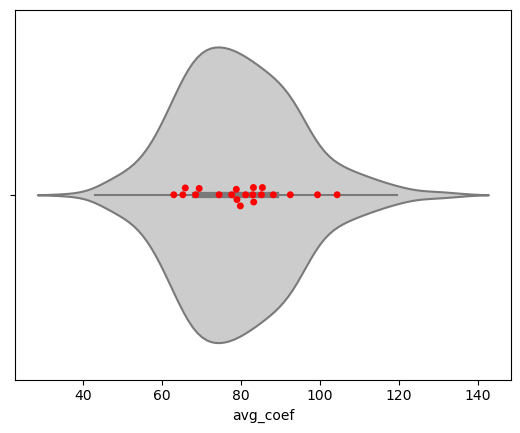

In [70]:
sns.violinplot(x='avg_coef', color=".8", data=_all)
sns.swarmplot(x='avg_coef', color='red', data=winners)
plt.show()

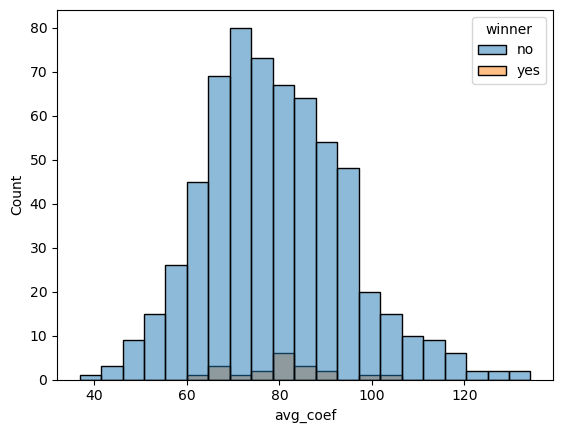

In [71]:
sns.histplot(x='avg_coef', hue='winner', data=_all)
plt.show()

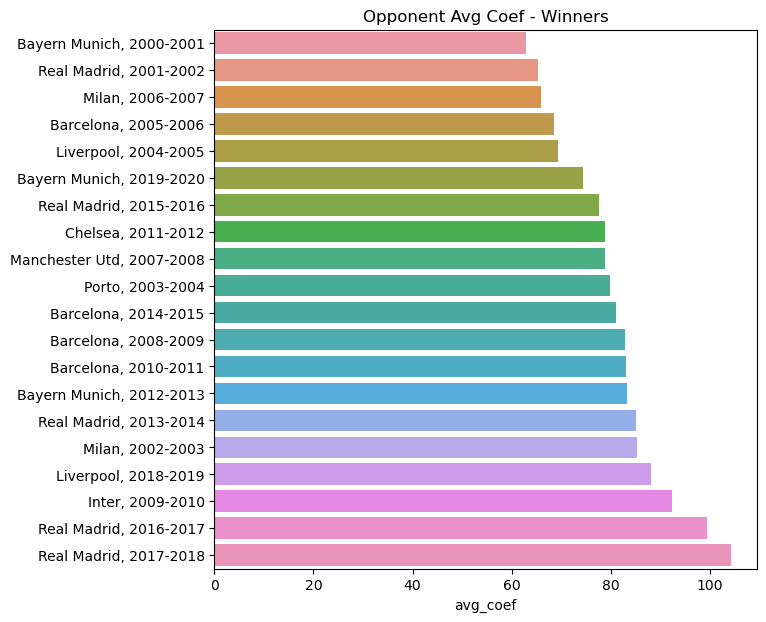

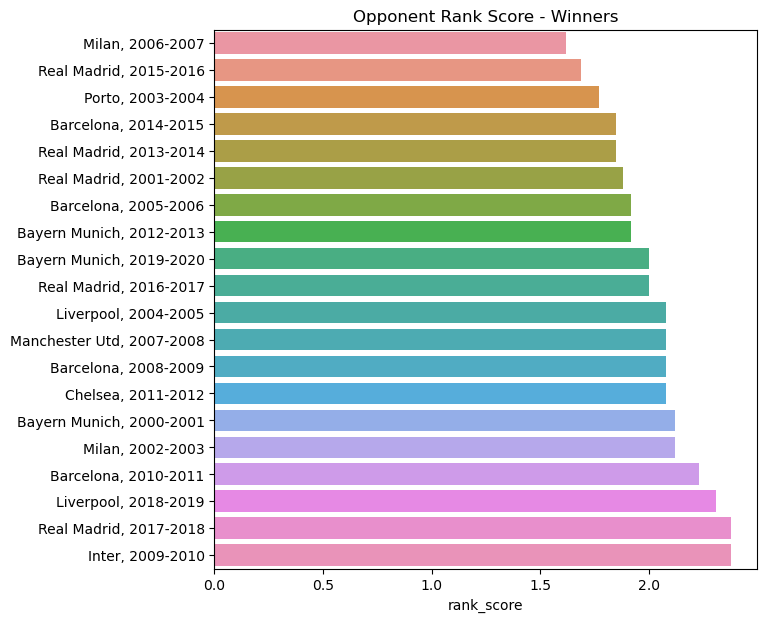

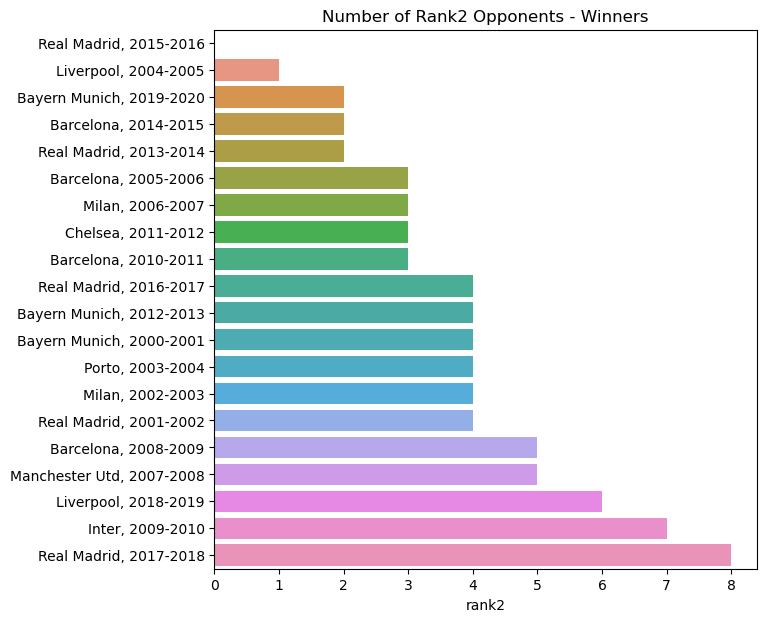

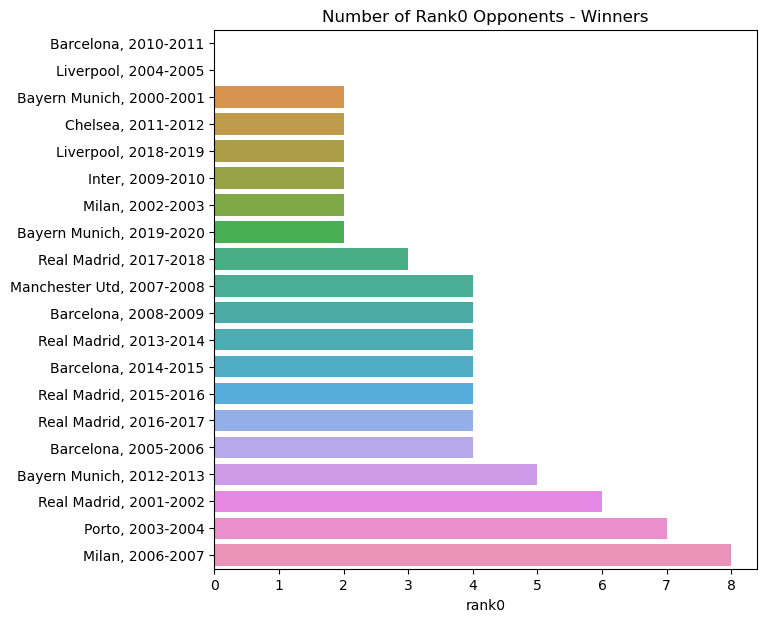

In [72]:
barplot_teams('avg_coef', 'Opponent Avg Coef - Winners', winners.sort_values('avg_coef'))
barplot_teams('rank_score', 'Opponent Rank Score - Winners', winners.sort_values('rank_score'))
barplot_teams('rank2', 'Number of Rank2 Opponents - Winners', winners.sort_values('rank2'))
barplot_teams('rank0', 'Number of Rank0 Opponents - Winners', winners.sort_values('rank0'))

plt.show()


In [73]:
_all

,season,rnd,team,total_games,avg_coef,rank_score,rank0,rank1,rank2,last_rnd,finals_oppo_rank,winner
0,2000-2001,all,Sturm Graz,12,60.582833,2.00,2.0,8.0,2.0,second_group,0,no
3,2016-2017,all,Legia Warsaw,6,112.597667,2.00,2.0,2.0,2.0,group,0,no
5,2006-2007,all,Levski Sofia,6,95.635333,2.33,0.0,4.0,2.0,group,0,no
7,2000-2001,all,Hamburger SV,6,69.453000,2.33,0.0,4.0,2.0,first_group,0,no
9,2006-2007,all,Hamburger SV,6,77.329000,2.00,2.0,2.0,2.0,group,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
1816,2014-2015,all,Shakhtar,8,98.668125,2.00,2.0,4.0,2.0,r16,0,no
1819,2015-2016,all,Shakhtar,6,122.528000,2.33,0.0,4.0,2.0,group,0,no
1821,2017-2018,all,Shakhtar,8,68.065500,1.50,4.0,4.0,0.0,r16,0,no
1824,2018-2019,all,Shakhtar,6,75.500000,2.00,0.0,6.0,0.0,group,0,no


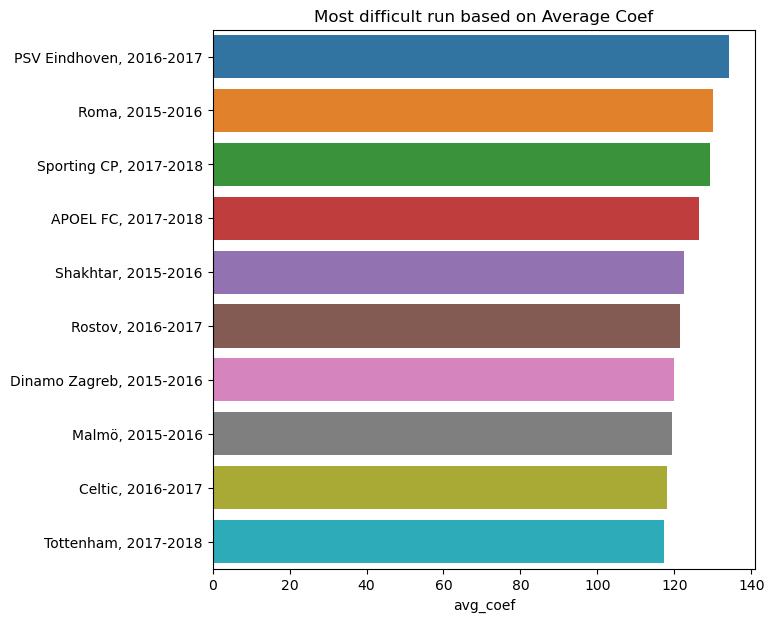

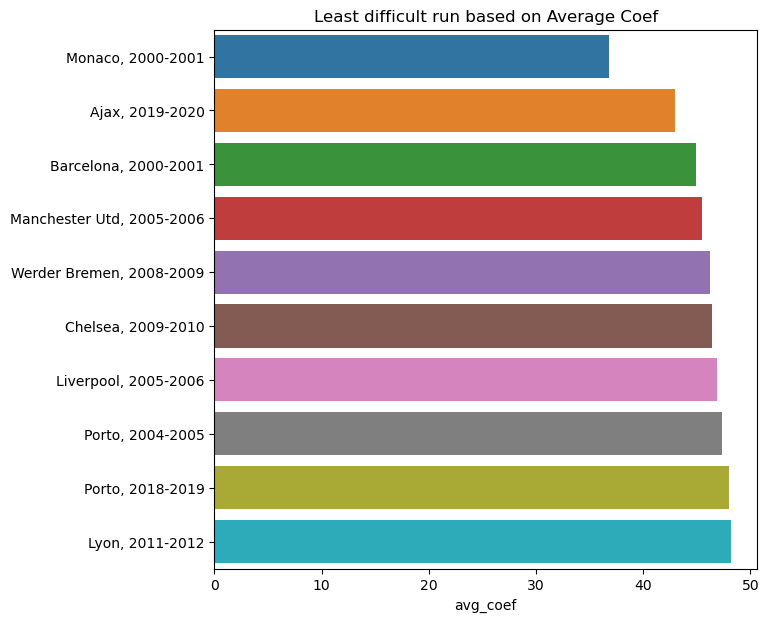

In [74]:
all_top_coef = _all.sort_values('avg_coef', ascending=False).head(10)
all_btm_coef = _all.sort_values('avg_coef', ascending=True).head(10)
barplot_teams('avg_coef', 'Most difficult run based on Average Coef', all_top_coef)
barplot_teams('avg_coef', 'Least difficult run based on Average Coef', all_btm_coef)

# all_btm_coef = _all[_all.last_rnd > 'quarters'].sort_values('rank_score', ascending=True).head(10)

# Finals

In [75]:
games.reset_index(inplace=True)

In [76]:
games_final = games[games.rnd == 'final']
champ_coef_diff = (pd.DataFrame(np.select((games_final.h_team == games_final.game_winner, games_final.a_team == games_final.game_winner),
                                        ((games_final.season, games_final.game_winner,games_final.coefdiff), 
                                        (games_final.season, games_final.game_winner, games_final.coefdiff*-1))))
                                        .T
                                        .rename(columns={0:'season', 1:'Teams', 2:'Coefficient Difference'})
                                        .astype({'Coefficient Difference': 'float'})
                                        .round(2)
                                        )
champ_coef_diff['Season_Teams'] = champ_coef_diff.season + ', ' + champ_coef_diff.Teams
champ_coef_diff.sort_values('Coefficient Difference', inplace=True)
champ_coef_diff

,season,Teams,Coefficient Difference,Season_Teams
9,2009-2010,Inter,-26.81,"2009-2010, Inter"
2,2002-2003,Milan,-22.00,"2002-2003, Milan"
4,2004-2005,Liverpool,-9.02,"2004-2005, Liverpool"
18,2018-2019,Liverpool,-5.00,"2018-2019, Liverpool"
7,2007-2008,Manchester Utd,0.00,"2007-2008, Manchester Utd"
8,2008-2009,Barcelona,9.84,"2008-2009, Barcelona"
11,2011-2012,Chelsea,10.27,"2011-2012, Chelsea"
10,2010-2011,Barcelona,11.58,"2010-2011, Barcelona"
6,2006-2007,Milan,23.07,"2006-2007, Milan"
5,2005-2006,Barcelona,23.46,"2005-2006, Barcelona"


In [77]:
title = 'Difference in Finals Opponent Coefficient for Champions'
fig = px.bar(champ_coef_diff,y='Season_Teams', x='Coefficient Difference', text='Coefficient Difference', title=title, orientation='h', height=1000)
fig.show()

In [78]:
champ_mean_coef_diff = (
    champ_coef_diff.groupby('Teams')['Coefficient Difference']
        .agg(['mean', 'count'])
        # removing champions who have only played one time
        .query('count > 1')
        .sort_values('mean')
        .rename(columns={'mean': 'Mean Coef Diff', 'count': 'Number of Wins'})
        .rename_axis('Teams')
        .round(2)
)
champ_mean_coef_diff

,Mean Coef Diff,Number of Wins
Teams,,
Liverpool,-7.01,2
Milan,0.54,2
Barcelona,30.51,4
Bayern Munich,53.47,3
Real Madrid,67.23,5


In [79]:
title = 'Mean Difference in Finals Opponent Coefficient for Champions'
fig = px.bar(champ_mean_coef_diff, y='Mean Coef Diff', text='Mean Coef Diff', title=title)
fig.show()

# Group Stage

In [80]:
group

,season,rnd,team,total_games,avg_coef,rank_score,rank0,rank1,rank2,last_rnd,finals_oppo_rank,winner
4,2016-2017,group,Legia Warsaw,6,112.597667,2.00,2.0,2.0,2.0,NaN,0,0
6,2006-2007,group,Levski Sofia,6,95.635333,2.33,0.0,4.0,2.0,NaN,0,0
10,2006-2007,group,Hamburger SV,6,77.329000,2.00,2.0,2.0,2.0,NaN,0,0
12,2003-2004,group,Marseille,6,86.491667,2.00,2.0,2.0,2.0,NaN,0,0
14,2007-2008,group,Marseille,6,81.838667,2.00,2.0,2.0,2.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1817,2014-2015,group,Shakhtar,6,80.114833,1.67,2.0,4.0,0.0,NaN,0,0
1820,2015-2016,group,Shakhtar,6,122.528000,2.33,0.0,4.0,2.0,NaN,0,0
1822,2017-2018,group,Shakhtar,6,72.865333,1.67,2.0,4.0,0.0,NaN,0,0
1825,2018-2019,group,Shakhtar,6,75.500000,2.00,0.0,6.0,0.0,NaN,0,0


In [81]:
group['Season_Team'] = group.season + ', ' + group.team
avg_coef_top = group.sort_values('avg_coef', ascending=False).head(10)
fig = go.Figure(data=[
    go.Bar(name='Avg Coefficient', y=avg_coef_top['Season_Team'], x=(avg_coef_top['avg_coef']/100), orientation='h'),
    go.Bar(name='Rank Score', y=avg_coef_top['Season_Team'], x=avg_coef_top['rank_score'], orientation='h'),
    go.Bar(name='Rank2', y=avg_coef_top['Season_Team'], x=avg_coef_top['rank2'], orientation='h')
])
fig.update_layout(barmode='group')
fig.show()

avg_coef_top = group.sort_values('avg_coef', ascending=False).head(10)
rank2_top = group.sort_values('rank2', ascending=False).head(10)
fig = go.Figure(data=[
    go.Bar(name='Avg Coefficient', y=rank2_top['Season_Team'], x=(rank2_top['avg_coef']/100), orientation='h'),
    go.Bar(name='Rank Score', y=rank2_top['Season_Team'], x=rank2_top['rank_score'], orientation='h'),
    go.Bar(name='Rank2', y=rank2_top['Season_Team'], x=rank2_top['rank2'], orientation='h')
])
fig.update_layout(barmode='group')
fig.show()

<ipython-input-81-be50cba0b229>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
def rnd_graphs(df: pd.DataFrame, rnd: str):
    df['Season_Team'] = df.season + ', ' + df.team
    df = df.round(2)

    # Toughest rounds
    avg_coef_top = df.sort_values('avg_coef', ascending=False).head(10)
    rank_score_top = df.sort_values('rank_score', ascending=False).head(10)
    rank2_top = df.sort_values('rank2', ascending=False).head(10)
    rank0_top = df.sort_values('rank0', ascending=False).tail(10)

    # Easiest rounds
    avg_coef_btm = df.sort_values('avg_coef', ascending=False).tail(10)
    rank_score_btm = df.sort_values('rank_score', ascending=False).tail(10)
    rank2_btm = df.sort_values('rank2', ascending=False).tail(10)
    rank0_btm = df.sort_values('rank0', ascending=False).head(10)

    fig = make_subplots(rows=2, cols=2)

    fig.add_trace(go.Bar(
        name=f'Top Opponent Average Coefficient - {rnd}',
        x=avg_coef_top['avg_coef'],
        y=avg_coef_top['Season_Team'],
        text=avg_coef_top['avg_coef'],
        orientation='h',
        ), row=1, col=1)
    fig.add_trace(go.Bar(
        name=f'Top Rank Score - {rnd}',
        x=rank_score_top['rank_score'],
        y=rank_score_top['Season_Team'],
        text=rank_score_top['rank_score'],
        orientation='h',
        ), row=1, col=2)
    fig.add_trace(go.Bar(
        name=f'Most Opponent Rank2 - {rnd}',
        x=rank2_top['rank2'],
        y=rank2_top['Season_Team'],
        text=rank2_top['rank2'],
        orientation='h',
        ), row=2, col=1)
    fig.add_trace(go.Bar(
        name=f'Least Opponent Rank0 - {rnd}',
        x=rank0_top['rank0'],
        y=rank0_top['Season_Team'],
        text=rank0_top['rank0'],
        orientation='h',
        ), row=2, col=2)
        
    fig.update_layout(height=1200, width=2000, title_text=f'Toughest - {rnd}',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1))
    fig.show()


    fig = make_subplots(rows=2, cols=2)
    fig.add_trace(go.Bar(
        name=f'Bottom Opponent Average Coefficient - {rnd}',
        x=avg_coef_btm['avg_coef'],
        y=avg_coef_btm['Season_Team'],
        text=avg_coef_btm['avg_coef'],
        orientation='h',
        ), row=1, col=1)
    fig.add_trace(go.Bar(
        name=f'Bottom Rank Score - {rnd}',
        x=rank_score_btm['rank_score'],
        y=rank_score_btm['Season_Team'],
        text=rank_score_btm['rank_score'],
        orientation='h',
        ), row=1, col=2)
    fig.add_trace(go.Bar(
        name=f'Least Opponent Rank2 - {rnd}',
        x=rank2_btm['rank2'],
        y=rank2_btm['Season_Team'],
        text=rank2_btm['rank2'],
        orientation='h',
        ), row=2, col=1)
    fig.add_trace(go.Bar(
        name=f'Most Opponent Rank0 - {rnd}',
        x=rank0_btm['rank0'],
        y=rank0_btm['Season_Team'],
        text=rank0_btm['rank0'],
        orientation='h',
        ), row=2, col=2)
    fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
    fig.update_layout(autosize=False, height=1200, width=2000, title_text=f'Easiest - {rnd}',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1))
    fig.show()



In [85]:

rnd_graphs(_all, 'All Rounds')
rnd_graphs(group, 'Group Stage')
rnd_graphs(r16, 'Round of 16')
rnd_graphs(quarters, 'Quarters')
rnd_graphs(semis, 'Semis')

<ipython-input-84-76dc6b3f9c30>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

